In [4]:
import matplotlib.pyplot as plt

import MySQLdb
from datetime import datetime
import numpy as np
import pandas as pd
import re
import math as math
import trilatWrapper as tw
import trilatDistWrapper as tdw


In [2]:
db = MySQLdb.connect(host="hgltdb.ckapwzvj8jd5.us-west-1.rds.amazonaws.com",  # your host, usually localhost
                     user="logisticadmin",  # your username
                     passwd="ppnanaapr29",  # your password
                     db="lgdb")  # name of the data base

# you must create a Cursor object. It will let
#  you execute all the queries you need
cur = db.cursor()

# Use all the SQL you like
# cur.execute("SELECT t.name AS table_name, SCHEMA_NAME(schema_id) AS schema_name, c.name AS column_name FROM sys.tables AS t 	INNER JOIN sys.columns c ON t.OBJECT_ID = c.OBJECT_ID where t.name = 'ProductItem'  AND C.name like '%retail%' ORDER BY schema_name, table_name")
cur.execute("show tables")
cur.fetchall()

(('GatewayLocation',), ('dtoa',), ('fport',))

In [3]:
filename = 'ServerData' + str(datetime.now().date()).replace(" ", "").replace(":", "-") + '.csv'

f = open(filename, 'w')

In [4]:
cur.execute("SELECT * FROM dtoa")

704L

In [5]:
row1 = cur.fetchone()
print row1

(1L, 0L, 1L, 239757772L, '2017-12-10T00:21:48.377136Z', '172.56.39.153:42521', '0.00000000', '0.00000000', None, None, '37.40283', '-121.97539', 15.0, 'Z33P3yYyiqf4yVM13rx3Pw==', 188313836L, None, None, None, -80.0, 'rv\xc3\xbf\x00.\x05\x05\xc3\x84')


In [6]:
prevLatLonDict = {}
for row in cur.fetchall():
    if (row[6] and row[7]):
        if (row[11] and row[12]):
            prevLat = row[11]
            prevLon = row[12]
            prevLatLonDict[row[5]] = [prevLat, prevLon]
            f.write(str(row))
            f.write('\n')
        else:
            try:
                extrapLat, extrapLon = prevLatLonDict.get(row[5])
                newRow = str(row[0]) + "," + str(row[1]) + "," + str(row[2]) + "," + str(row[3]) + "," + str(
                    row[4]) + "," + str(row[5]) + "," + str(row[6]) + "," + str(row[7]) + "," + str(row[8]) + "," + str(
                    row[9]) + "," + str(row[10]) + "," + extrapLat + "," + extrapLon + "," + str(row[13]) + "," + str(
                    row[14])
                f.write(newRow)
                f.write('\n')
            except:
                pass

f.close()

In [5]:
filename = 'ServerData2017-12-16.csv'
serverdata = pd.read_csv(filename,
                         names=["RID", "MsgNo", "TID", "tmst", "ts", "gwip", "gpslat", "gpslon", "temp", "pressure",
                                 "gwlat", "gwlon", "lsnr", "etime", "ftime","extraCol2","extraCol3",
                               "extraCol4","rssic","extraCol6"])


In [6]:
filename

'ServerData2017-12-16.csv'

In [7]:
serverdata.dtypes

RID           object
MsgNo         object
TID           object
tmst          object
ts            object
gwip          object
gpslat        object
gpslon        object
temp          object
pressure      object
gwlat         object
gwlon         object
lsnr         float64
etime         object
ftime         object
extraCol2     object
extraCol3     object
extraCol4     object
rssic         object
extraCol6     object
dtype: object

In [9]:
serverdata.head(20)

,RID,MsgNo,TID,tmst,ts,gwip,gpslat,gpslon,temp,pressure,gwlat,gwlon,lsnr,etime,ftime,extraCol2,extraCol3,extraCol4,rssic,extraCol6
0,(2L,0L,1L,121142060L,'2017-12-10T00:21:48.377132Z','172.56.39.253:61960','0.00000000','0.00000000',None,None,'37.40053','-121.97447',15.0,'qH5shdgpc2UeDvnl2wRsNg==',188313113L,None,None,None,-76.0,'rv\xc3\xbf\x00.\x05\x05!')
1,(3L,0L,1L,289966380L,'2017-12-10T00:21:48.377133Z','172.56.38.52:23411','0.00000000','0.00000000',None,None,'37.40026','-121.9774',13.0,'vBgcPKK4LixS0vbPh9jfEA==',188314884L,None,None,None,-98.0,'rv\xc3\xbf\x00.\x05\t\x16')
2,(4L,0L,1L,187274276L,'2017-12-10T00:21:48.377135Z','172.56.39.79:39374','0.00000000','0.00000000',None,None,'37.4023','-121.97353',15.0,'cfVH3xKsR7nwpjuhDWDPEw==',188312432L,None,None,None,-61.0,'rv\xc3\xbf\x00.\x05\x07\xc2\xac')
3,(5L,1L,1L,197484308L,'2017-12-10T00:21:58.587167Z','172.56.39.79:39374','0.00000000','0.00000000',None,None,'37.4023','-121.97353',15.0,'mwRiLvQlt3urHdDnwfwwpw==',398346484L,None,None,None,-62.0,'rv\xc3\xbf\x00.\x05\x07\xc2\xac')
4,(6L,1L,1L,300176420L,'2017-12-10T00:21:58.587171Z','172.56.38.52:23411','0.00000000','0.00000000',None,None,'37.40026','-121.97741',9.0,'/n+OBy5QwjUGu2K7Lk15fg==',398348784L,None,None,None,-100.0,'rv\xc3\xbf\x00.\x05\t\x16')
5,(7L,1L,1L,249967804L,'2017-12-10T00:21:58.587165Z','172.56.39.153:42521','0.00000000','0.00000000',None,None,'37.40282','-121.97539',6.0,'MQHDh6u/dfmG31G+7YsteA==',398347525L,None,None,None,-93.0,'rv\xc3\xbf\x00.\x05\x05\xc3\x84')
6,(8L,1L,1L,131352100L,'2017-12-10T00:21:58.587169Z','172.56.39.253:61960','0.00000000','0.00000000',None,None,'37.40053','-121.97447',13.0,'u+pxs+zo+XO1XqhcHDUGkA==',398347431L,None,None,None,-81.0,'rv\xc3\xbf\x00.\x05\x05!')
7,(9L,2L,1L,310386860L,'2017-12-10T00:22:08.797609Z','172.56.38.52:23411','0.00000000','0.00000000',None,None,'37.40026','-121.97741',13.0,'EumNDstQ9GjmEdDKj4CoFA==',608794560L,None,None,None,-97.0,'rv\xc3\xbf\x00.\x05\t\x16')
8,(10L,2L,1L,141562540L,'2017-12-10T00:22:08.797606Z','172.56.39.253:61960','0.00000000','0.00000000',None,None,'37.40053','-121.97447',15.0,'pL8eXOlOGJrxcBo9s/NoRA==',608792826L,None,None,None,-79.0,'rv\xc3\xbf\x00.\x05\x05!')
9,(11L,2L,1L,260178252L,'2017-12-10T00:22:08.797610Z','172.56.39.153:42521','0.00000000','0.00000000',None,None,'37.40282','-121.97539',14.0,'byyDNgYsnEc+s7tBrHBlyw==',608793001L,None,None,None,-89.0,'rv\xc3\xbf\x00.\x05\x05\xc3\x84')


In [10]:
np.sum(serverdata['etime'].str.contains('None'))
badMsgNo = serverdata[serverdata['etime'].str.contains('None')]['MsgNo']

In [11]:
#string(badMsgNo)

In [12]:
serverdata.shape

(674, 20)

In [13]:
serverdata = serverdata[np.invert(serverdata['MsgNo'].str.contains('83L'))]
serverdata.shape

(668, 20)

In [14]:
tsObjData = pd.DataFrame([])
non_decimal = re.compile(r'[^\d.]+')
for index, row in serverdata.iterrows():
    tsObjData.loc[row['RID'], 'rid'] = row['RID']
    tsObjData.loc[row['RID'], 'gwip'] = row['gwip']
    tsObjData.loc[row['RID'], 'msgno'] = non_decimal.sub('', row['MsgNo'])
    if (len(row['ts']) == 27):
        tsObjData.loc[row['RID'], 'ts'] = row['ts'][19:26]
        tsObjData.loc[row['RID'], 'date'] = row['ts'][2:12]
    else:
        tsObjData.loc[row['RID'], 'ts'] = row['ts'][21:28]
        tsObjData.loc[row['RID'], 'date'] = row['ts'][2:12]
    tsObjData.loc[row['RID'], 'gpslat'] = non_decimal.sub('', str(row['gpslat']))
    tsObjData.loc[row['RID'], 'netgpslon'] = non_decimal.sub('', str(row['gpslon']))
    tsObjData.loc[row['RID'], 'gwlat'] = non_decimal.sub('', str(row['gwlat']))
    tsObjData.loc[row['RID'], 'netgwlon'] = non_decimal.sub('', str(row['gwlon']))

    tsObjData.loc[row['RID'], 'rssic'] = row['rssic']
    tsObjData.loc[row['RID'], 'lsnr'] = float(row['lsnr'])
    tsObjData.loc[row['RID'], 'ftime'] = long(row['ftime'])/1e9
    

In [15]:
tsObjData.head(20)

,rid,gwip,msgno,ts,date,gpslat,netgpslon,gwlat,netgwlon,rssic,lsnr,ftime
(2L,(2L,'172.56.39.253:61960',0,.377132,2017-12-10,0.00000000,0.00000000,37.40053,121.97447,-76.0,15.0,0.188313
(3L,(3L,'172.56.38.52:23411',0,.377133,2017-12-10,0.00000000,0.00000000,37.40026,121.9774,-98.0,13.0,0.188315
(4L,(4L,'172.56.39.79:39374',0,.377135,2017-12-10,0.00000000,0.00000000,37.4023,121.97353,-61.0,15.0,0.188312
(5L,(5L,'172.56.39.79:39374',1,.587167,2017-12-10,0.00000000,0.00000000,37.4023,121.97353,-62.0,15.0,0.398346
(6L,(6L,'172.56.38.52:23411',1,.587171,2017-12-10,0.00000000,0.00000000,37.40026,121.97741,-100.0,9.0,0.398349
(7L,(7L,'172.56.39.153:42521',1,.587165,2017-12-10,0.00000000,0.00000000,37.40282,121.97539,-93.0,6.0,0.398348
(8L,(8L,'172.56.39.253:61960',1,.587169,2017-12-10,0.00000000,0.00000000,37.40053,121.97447,-81.0,13.0,0.398347
(9L,(9L,'172.56.38.52:23411',2,.797609,2017-12-10,0.00000000,0.00000000,37.40026,121.97741,-97.0,13.0,0.608795
(10L,(10L,'172.56.39.253:61960',2,.797606,2017-12-10,0.00000000,0.00000000,37.40053,121.97447,-79.0,15.0,0.608793
(11L,(11L,'172.56.39.153:42521',2,.797610,2017-12-10,0.00000000,0.00000000,37.40282,121.97539,-89.0,14.0,0.608793


In [16]:
#the difference TDOA using ftime is about 0.7 microseconds, which translate to 200 Meters
tsObjData['ftime'][1] - tsObjData['ftime'][0]

1.7709999999837578e-06

In [17]:
#the difference TDOA using ts is about 4 microseconds, which translate to 1200 Meters
float(tsObjData['ts'][1]) - float(tsObjData['ts'][0])

9.999999999732445e-07

In [18]:
tsObjData.shape

(668, 12)

In [19]:
np.sum(tsObjData['date'].str.contains('2017-12-10'))

492

In [20]:
tsObjData = tsObjData[tsObjData['date'].str.contains('2017-12-10')]
tsObjData.shape

(492, 12)

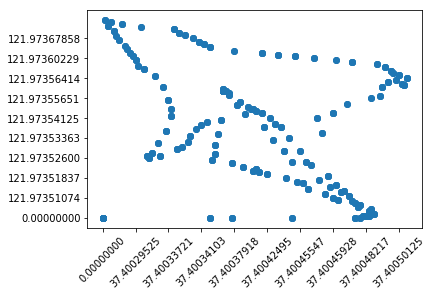

In [21]:
plt.scatter(tsObjData['gpslat'], tsObjData['netgpslon'])
plt.locator_params(nbins=10)
plt.xticks(rotation=45)
plt.show() 
#Center 121.97354, 37.40040
#corner1  121.97367858, 37.40029525

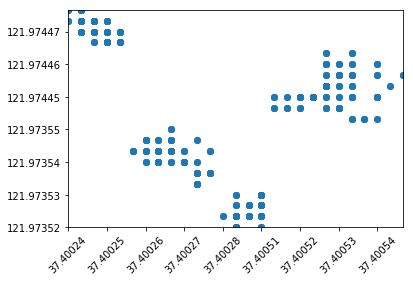

In [22]:
plt.scatter(tsObjData['gwlat'], tsObjData['netgwlon'])
plt.locator_params(nbins=10)
plt.xticks(rotation=45)
plt.axis([min(tsObjData['gwlat']), max(tsObjData['gwlat']), min(tsObjData['netgwlon']), max(tsObjData['netgwlon'])])
plt.show()



In [23]:
def haversinedist1(p1, p2):
    lat1 = p1[0]
    lon1 = p1[1]
    lat2 = p2[0]
    lon2 = p2[1]
    # distance in km
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = (np.sin(dlat / 2)) ** 2 + np.cos(lat1) * np.cos(lat2) * (np.sin(dlon / 2)) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return 6371 * c * 1.46843 / 100


In [24]:
gw1 = [37.40024, 121.97447]
gw2 = [37.40026, 121.97354]
gw3 = [37.40039, 121.97352]
gw4 = [37.40053, 121.97446]
[haversinedist1(gw1, gw2)*1000, haversinedist1(gw1, gw4)*1000, haversinedist1(gw2, gw3)*1000]

[83.169232390441621, 27.145294693970857, 12.292732446230916]

In [25]:
def haversinedist(lat1, lon1, lat2, lon2):
    # distance in km
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = (np.sin(dlat / 2)) ** 2 + np.cos(lat1) * np.cos(lat2) * (np.sin(dlon / 2)) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return 6371 * c * 1.46843 / 100


In [26]:
clusterTsData = pd.DataFrame([])
currMsgCount = 0
currMsgNo = 2  # based on first value in the data
countSuccess = 0
prevRow = None
prevPrevRow = None
prev3Row = None
for index, row in tsObjData.iterrows():
    prevMsgNo = currMsgNo
    currMsgNo = row["msgno"]
    if prevMsgNo == currMsgNo:
        # print "Found one more"
        currMsgCount += 1
    else:
        # print "New Message"
        currMsgCount = 1
    if currMsgCount == 4:  # adjust to number of gateways
        # how to add previous row on as well?
        addrows = [prev3Row, prevPrevRow, prevRow, row]
        for ar in addrows:
            clusterTsData.loc[ar['rid'], 'msgno'] = ar['msgno']
            clusterTsData.loc[ar['rid'], 'gwip'] = ar['gwip']
            clusterTsData.loc[ar['rid'], 'ts'] = ar['ts']
            clusterTsData.loc[ar['rid'], 'ftime'] = ar['ftime']
            clusterTsData.loc[ar['rid'], 'gpslat'] = ar['gpslat']
            clusterTsData.loc[ar['rid'], 'netgpslon'] = ar['netgpslon']
            clusterTsData.loc[ar['rid'], 'gwlat'] = ar['gwlat']
            clusterTsData.loc[ar['rid'], 'netgwlon'] = ar['netgwlon']
            clusterTsData.loc[ar['rid'], 'rssic'] = ar['rssic']
            clusterTsData.loc[ar['rid'], 'lsnr'] = ar['lsnr']
            clusterTsData.loc[ar['rid'], 'geodist'] = haversinedist(float(non_decimal.sub('', ar['gpslat'])),
                                                                    float(non_decimal.sub('', ar['netgpslon'])),
                                                                    float(non_decimal.sub('', ar['gwlat'])),
                                                                    float(non_decimal.sub('', ar['netgwlon'])))
        countSuccess += 1
    prev3Row = prevPrevRow
    prevPrevRow = prevRow
    prevRow = row


In [27]:
clusterTsData.head(20)

,msgno,gwip,ts,ftime,gpslat,netgpslon,gwlat,netgwlon,rssic,lsnr,geodist
(5L,1,'172.56.39.79:39374',.587167,0.398346,0.00000000,0.00000000,37.4023,121.97353,-62.0,15.0,236.239299
(6L,1,'172.56.38.52:23411',.587171,0.398349,0.00000000,0.00000000,37.40026,121.97741,-100.0,9.0,236.468957
(7L,1,'172.56.39.153:42521',.587165,0.398348,0.00000000,0.00000000,37.40282,121.97539,-93.0,6.0,236.410396
(8L,1,'172.56.39.253:61960',.587169,0.398347,0.00000000,0.00000000,37.40053,121.97447,-81.0,13.0,236.243368
(9L,2,'172.56.38.52:23411',.797609,0.608795,0.00000000,0.00000000,37.40026,121.97741,-97.0,13.0,236.468957
(10L,2,'172.56.39.253:61960',.797606,0.608793,0.00000000,0.00000000,37.40053,121.97447,-79.0,15.0,236.243368
(11L,2,'172.56.39.153:42521',.797610,0.608793,0.00000000,0.00000000,37.40282,121.97539,-89.0,14.0,236.410396
(12L,2,'172.56.39.79:39374',.797608,0.608792,0.00000000,0.00000000,37.4023,121.97353,-58.0,15.0,236.239299
(13L,3,'172.56.38.52:23411',.008223,0.819405,0.00000000,0.00000000,37.40026,121.97741,-92.0,15.0,236.468957
(14L,3,'172.56.39.153:42521',.008215,0.819404,0.00000000,0.00000000,37.40281,121.97539,-82.0,15.0,236.409991


In [28]:
clusterTsData.shape

(324, 11)

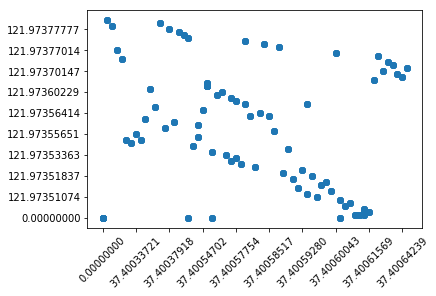

In [29]:
plt.scatter(clusterTsData['gpslat'], clusterTsData['netgpslon'])
plt.locator_params(nbins=10)
plt.xticks(rotation=45)
plt.show() 

In [30]:
# remove data with huge geodist because their gps measurement are ZERO
clusterTsDataClean = clusterTsData.loc[clusterTsData['geodist'] < 200]

In [31]:
clusterTsDataClean.shape

(296, 11)

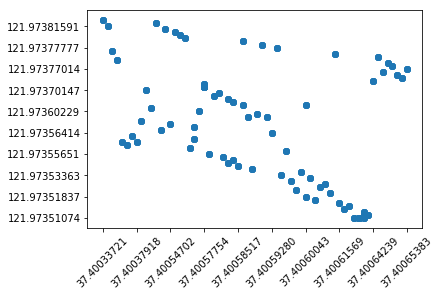

In [32]:
plt.scatter(clusterTsDataClean['gpslat'], clusterTsDataClean['netgpslon'])
plt.locator_params(nbins=10)
plt.xticks(rotation=45)
plt.show() 

In [33]:
clusterTsDataClean.head(20)

,msgno,gwip,ts,ftime,gpslat,netgpslon,gwlat,netgwlon,rssic,lsnr,geodist
(17L,4,'172.56.38.52:23411',.230965,0.031906,37.40224075,121.97351074,37.40026,121.9774,-94.0,13.0,0.394114
(18L,4,'172.56.39.79:39374',.230970,0.031904,37.40224075,121.97351074,37.4023,121.97352,-58.0,15.0,0.005605
(19L,4,'172.56.39.253:61960',.230968,0.031905,37.40224075,121.97351074,37.40053,121.97447,-85.0,15.0,0.181592
(20L,4,'172.56.39.153:42521',.230964,0.031905,37.40224075,121.97351074,37.40281,121.97539,-82.0,15.0,0.176368
(24L,6,'172.56.39.79:39374',.656555,0.457498,37.40224456,121.97351074,37.40229,121.97353,-58.0,15.0,0.004587
(25L,6,'172.56.38.52:23411',.656554,0.457499,37.40224456,121.97351074,37.40026,121.9774,-99.0,9.0,0.394282
(26L,6,'172.56.39.153:42521',.656558,0.457499,37.40224456,121.97351074,37.4028,121.97539,-84.0,14.0,0.175982
(27L,6,'172.56.39.253:61960',.656553,0.457498,37.40224456,121.97351074,37.40053,121.97448,-87.0,14.0,0.182330
(28L,7,'172.56.39.253:61960',.869350,0.670297,37.40224456,121.97351074,37.40053,121.97448,-92.0,12.0,0.182330
(29L,7,'172.56.39.79:39374',.869348,0.670296,37.40224456,121.97351074,37.40229,121.97353,-61.0,15.0,0.004587


In [34]:
#sort so that four base stations are always in the same order for each measurement
orderClTs = pd.DataFrame([])
# for rc in range(0, clusterTsData.shape[0]):
rc = 0
length = clusterTsDataClean.shape[0]
while (rc < length):
    # tempfour = clusterTsData[rc:rc + 4].set_index('ts').sort_index()
    tempfour = clusterTsDataClean[rc: rc + 4].sort_values('gwip')
    frames = [orderClTs, tempfour]
    orderClTs = pd.concat(frames)
    rc += 4



In [35]:
orderClTs.head(10)

,msgno,gwip,ts,ftime,gpslat,netgpslon,gwlat,netgwlon,rssic,lsnr,geodist
(17L,4,'172.56.38.52:23411',.230965,0.031906,37.40224075,121.97351074,37.40026,121.9774,-94.0,13.0,0.394114
(20L,4,'172.56.39.153:42521',.230964,0.031905,37.40224075,121.97351074,37.40281,121.97539,-82.0,15.0,0.176368
(19L,4,'172.56.39.253:61960',.230968,0.031905,37.40224075,121.97351074,37.40053,121.97447,-85.0,15.0,0.181592
(18L,4,'172.56.39.79:39374',.230970,0.031904,37.40224075,121.97351074,37.4023,121.97352,-58.0,15.0,0.005605
(25L,6,'172.56.38.52:23411',.656554,0.457499,37.40224456,121.97351074,37.40026,121.9774,-99.0,9.0,0.394282
(26L,6,'172.56.39.153:42521',.656558,0.457499,37.40224456,121.97351074,37.4028,121.97539,-84.0,14.0,0.175982
(27L,6,'172.56.39.253:61960',.656553,0.457498,37.40224456,121.97351074,37.40053,121.97448,-87.0,14.0,0.182330
(24L,6,'172.56.39.79:39374',.656555,0.457498,37.40224456,121.97351074,37.40229,121.97353,-58.0,15.0,0.004587
(30L,7,'172.56.38.52:23411',.869352,0.670298,37.40224456,121.97351074,37.40026,121.97741,-93.0,15.0,0.395071
(31L,7,'172.56.39.153:42521',.869355,0.670297,37.40224456,121.97351074,37.4028,121.97539,-93.0,5.0,0.175982


In [36]:
#sanity check
#the difference TDOA using ftime is about 0.7 microseconds, which translate to 200 Meters
orderClTs['ftime'][1] - orderClTs['ftime'][2]

-4.2899999999623795e-07

In [37]:
[orderClTs['ftime'][1], orderClTs['ftime'][2], float(orderClTs['ts'][1]), float(orderClTs['ts'][2]) ]

[0.031904633000000002, 0.031905061999999998, 0.230964, 0.230968]

In [38]:
float(orderClTs['ts'][1]) - float(orderClTs['ts'][2])

-4.000000000004e-06

In [39]:

col = 'rssic'
orderClTs[col] = pd.to_numeric(orderClTs[col], errors='coerce')

In [40]:
orderClTs.dtypes

msgno         object
gwip          object
ts            object
ftime        float64
gpslat        object
netgpslon     object
gwlat         object
netgwlon      object
rssic        float64
lsnr         float64
geodist      float64
dtype: object

In [41]:
y = np.array(orderClTs['geodist'])
x = np.array(orderClTs['rssic'])

b = np.polyfit(x, y, 5)



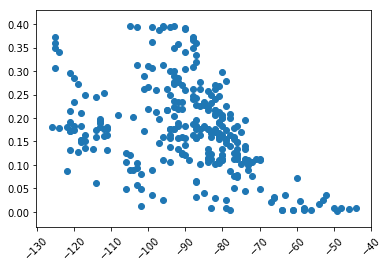

In [42]:
plt.scatter(x, y)
plt.locator_params(nbins=10)
plt.xticks(rotation=45)
plt.show()

In [43]:
b

array([ -3.35186561e-09,  -1.27433908e-06,  -1.84070286e-04,
        -1.25455970e-02,  -4.04748777e-01,  -4.95655562e+00])

In [44]:
guessDistOrdered = []
# Switch up the variable so can rapidly test each column
for r in np.array(orderClTs['rssic']):
    guessDistOrdered.append(b[0] * pow(r, 5) + b[1] * pow(r, 4) + b[2] * pow(r, 3) + b[3] * pow(r, 2) + b[4] * r + b[5])
# orderClTs['guessdist'] = np.array(guessDistOrdered).real
orderClTs['guessdist'] = np.absolute(np.array(guessDistOrdered))


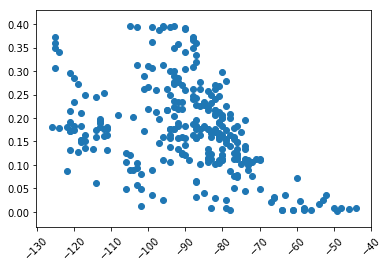

In [45]:
plt.scatter(orderClTs['rssic'], orderClTs['geodist'])
plt.locator_params(nbins=10)
plt.xticks(rotation=45)
plt.show()

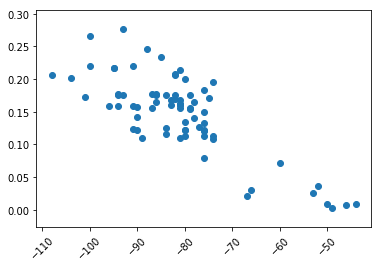

In [46]:
#str.contains("ball")
orderClTs1 = orderClTs[orderClTs['gwip'].str.contains('172.56.39.153:42521')]
plt.scatter(orderClTs1['rssic'], orderClTs1['geodist'])
plt.locator_params(nbins=10)
plt.xticks(rotation=45)
plt.show()

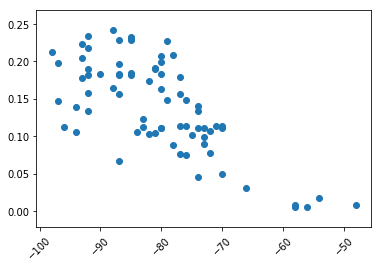

In [47]:

orderClTs1 = orderClTs[orderClTs['gwip'].str.contains('172.56.39.253:61960')]
plt.scatter(orderClTs1['rssic'], orderClTs1['geodist'])
plt.locator_params(nbins=10)
plt.xticks(rotation=45)
plt.show()

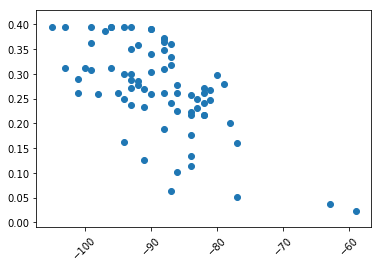

In [48]:
orderClTs2 = orderClTs[orderClTs['gwip'].str.contains('172.56.38.52:23411')]
plt.scatter(orderClTs2['rssic'], orderClTs2['geodist'])
plt.locator_params(nbins=10)
plt.xticks(rotation=45)
plt.show()

In [49]:
earthR = 6371
c = 299792


def trilat_open(ts1, ts2, ts3):
    x1 = earthR * (math.cos(math.radians(ts1.getLatitude())) * math.cos(math.radians(ts1.getLongitude())))
    y1 = earthR * (math.cos(math.radians(ts1.getLatitude())) * math.sin(math.radians(ts1.getLongitude())))
    z1 = earthR * (math.sin(math.radians(ts1.getLatitude())))

    x2 = earthR * (math.cos(math.radians(ts2.getLatitude())) * math.cos(math.radians(ts2.getLongitude())))
    y2 = earthR * (math.cos(math.radians(ts2.getLatitude())) * math.sin(math.radians(ts2.getLongitude())))
    z2 = earthR * (math.sin(math.radians(ts2.getLatitude())))

    x3 = earthR * (math.cos(math.radians(ts3.getLatitude())) * math.cos(math.radians(ts3.getLongitude())))
    y3 = earthR * (math.cos(math.radians(ts3.getLatitude())) * math.sin(math.radians(ts3.getLongitude())))
    z3 = earthR * (math.sin(math.radians(ts3.getLatitude())))

    P1 = np.array([x1, y1, z1])
    P2 = np.array([x2, y2, z2])
    P3 = np.array([x3, y3, z3])

    ex = (P2 - P1) / (np.linalg.norm(P2 - P1))
    i = np.dot(ex, P3 - P1)
    ey = (P3 - P1 - i * ex) / (np.linalg.norm(P3 - P1 - i * ex))
    ez = np.cross(ex, ey)
    d = np.linalg.norm(P2 - P1)
    j = np.dot(ey, P3 - P1)

    # from wikipedia
    # plug and chug using above values
    x = (pow(ts1.getDist(), 2) - pow(ts2.getDist(), 2) + pow(d, 2)) / (2 * d)
    y = ((pow(ts1.getDist(), 2) - pow(ts3.getDist(), 2) + pow(i, 2) + pow(j, 2)) / (2 * j)) - ((i / j) * x)

    # only one case shown here
    z = np.sqrt(pow(ts1.getDist(), 2) - pow(x, 2) - pow(y, 2))

    # triPt is an array with ECEF x,y,z of trilateration point
    triPt = P1 + x * ex + y * ey + z * ez

    # convert back to lat/long from ECEF
    # convert to degrees
    lat = math.degrees(math.asin(triPt[2] / earthR))
    lon = math.degrees(math.atan2(triPt[1], triPt[0]))

    # print str(lat) + ", -" + str(lon)
    # return str(lat) + ", -" + str(lon)
    return lat, -1 * lon

def trilat4(tag, ts1, ts2, ts3, ts4):
    finalx = None
    finaly = None
    finalz = None
    finald = None

    base_time = ts1.getTimeStamp()
    td1 = math.fabs(ts2.getTimeStamp() - base_time)
    td2 = math.fabs(ts3.getTimeStamp() - base_time)
    td3 = math.fabs(ts4.getTimeStamp() - base_time)

    dd21 = c * td1
    dd31 = c * td2
    dd41 = c * td3

    # May have to adjust based on 2D or 3D possibilities w/ 4 gateways (as well as parameters below)
    x1 = earthR * (math.cos(math.radians(ts1.getLatitude())) * math.cos(math.radians(ts1.getLongitude())))
    y1 = earthR * (math.cos(math.radians(ts1.getLatitude())) * math.sin(math.radians(ts1.getLongitude())))
    z1 = earthR * (math.sin(math.radians(ts1.getLatitude())))

    x2 = earthR * (math.cos(math.radians(ts2.getLatitude())) * math.cos(math.radians(ts2.getLongitude())))
    y2 = earthR * (math.cos(math.radians(ts2.getLatitude())) * math.sin(math.radians(ts2.getLongitude())))
    z2 = earthR * (math.sin(math.radians(ts2.getLatitude())))

    x3 = earthR * (math.cos(math.radians(ts3.getLatitude())) * math.cos(math.radians(ts3.getLongitude())))
    y3 = earthR * (math.cos(math.radians(ts3.getLatitude())) * math.sin(math.radians(ts3.getLongitude())))
    z3 = earthR * (math.sin(math.radians(ts3.getLatitude())))

    x4 = earthR * (math.cos(math.radians(ts4.getLatitude())) * math.cos(math.radians(ts4.getLongitude())))
    y4 = earthR * (math.cos(math.radians(ts4.getLatitude())) * math.sin(math.radians(ts4.getLongitude())))
    z4 = earthR * (math.sin(math.radians(ts4.getLatitude())))

    # Bugging out w/ data type issues even with a valid matrix
    Hf = np.matrix([[x2, y2, z2, dd21], [x3, y3, z3, dd31], [x4, y4, z4, dd41]])

    def km_squared4(x, y, z, d):
        return (np.square(x) + np.square(y) + np.square(z) - np.square(d)) / 2.0

    km1 = km_squared4(x2, y2, z2, dd21)
    km2 = km_squared4(x3, y3, z3, dd31)
    km3 = km_squared4(x4, y4, z4, dd41)

    #     print km1
    #     print km2
    #     print km3

    m = np.array([km1, km2, km3])

    xf = np.linalg.lstsq(Hf, m)[0]

    finalx = xf[0]
    finaly = xf[1]
    finalz = xf[2]
    finald = xf[3]

    # Maybe test some assertion that all numbers are reasonable, as well as visualization for debugging
    # Cartesian back to Lat/Lon
    lat = math.degrees(math.asin(finalz / earthR))
    lon = math.degrees(math.atan2(finaly, finalx))

    #     lat = lat + 19.713
    #     lon = lon
    # Unique to these points
    # Blue points
    #     lat = lat + 19.713 + 0.0866155396 + 0.02734440888
    #     lon = lon - 0.00614129 - 0.02932030494
    # Yellow points (manual adjustment, latitude and longitude need to drop)
    #     lat = lat + 19.713 + 0.0866155396
    #     lon = lon - 0.00614129 - 0.02932030494 - 0.01
    # Red points (no more manual adjustment, but offsets dropped from 4 to 3)
    lat = lat + 19.713 + 0.0866155396
    lon = lon - 0.00614129 - 0.02932030494 - 0.01

    #     print str(lat)+",-" + str(lon) + " <green>"
    return lat, -1 * lon


In [50]:
def tdoa_lora_4(tag, ts1, ts2, ts3, ts4):
    #takes four time stamp measurements and four base positions. 
    #return the position of the tag
    
    finalx = None
    finaly = None
    finalz = None
    finald = None

    base_time = ts1.getTimeStamp()
    td21 = math.fabs(ts2.getTimeStamp() - base_time)
    td31 = math.fabs(ts3.getTimeStamp() - base_time)
    td41 = math.fabs(ts4.getTimeStamp() - base_time)

    dd21 = c * td21
    dd31 = c * td31
    dd41 = c * td41

    # May have to adjust based on 2D or 3D possibilities w/ 4 gateways (as well as parameters below)
    x1 = earthR * (math.cos(math.radians(ts1.getLatitude())) * math.cos(math.radians(ts1.getLongitude())))
    y1 = earthR * (math.cos(math.radians(ts1.getLatitude())) * math.sin(math.radians(ts1.getLongitude())))
    z1 = earthR * (math.sin(math.radians(ts1.getLatitude())))

    x2 = earthR * (math.cos(math.radians(ts2.getLatitude())) * math.cos(math.radians(ts2.getLongitude())))
    y2 = earthR * (math.cos(math.radians(ts2.getLatitude())) * math.sin(math.radians(ts2.getLongitude())))
    z2 = earthR * (math.sin(math.radians(ts2.getLatitude())))

    x3 = earthR * (math.cos(math.radians(ts3.getLatitude())) * math.cos(math.radians(ts3.getLongitude())))
    y3 = earthR * (math.cos(math.radians(ts3.getLatitude())) * math.sin(math.radians(ts3.getLongitude())))
    z3 = earthR * (math.sin(math.radians(ts3.getLatitude())))

    x4 = earthR * (math.cos(math.radians(ts4.getLatitude())) * math.cos(math.radians(ts4.getLongitude())))
    y4 = earthR * (math.cos(math.radians(ts4.getLatitude())) * math.sin(math.radians(ts4.getLongitude())))
    z4 = earthR * (math.sin(math.radians(ts4.getLatitude())))

    rSide1 = np.square(x2) + np.square(y2) - np.square(x1) - np.square(y1) - np.square(dd21)
    rSide2 = np.square(x3) + np.square(y3) - np.square(x1) - np.square(y1) - np.square(dd31)
    rSide3 = np.square(x4) + np.square(y4) - np.square(x1) - np.square(y1) - np.square(dd41)
    rSide = np.array([rSide1, rSide2, rSide3])
    
    lSide1 = [2*(x2-x1), 2*(y2-y1), 2*dd21]
    lSide2 = [2*(x3-x1), 2*(y3-y1), 2*dd31]
    lSide3 = [2*(x4-x1), 2*(y4-y1), 2*dd41]
    lSide = np.array([lSide1, lSide2, lSide3])
    
    result = np.linalg.solve(lSide, rSide)
    finalx = result[0]
    finaly = result[1]
    finald1 = result[2]
    #for z, we use the average of the four base station z
    finalz = (z1+z2+z3+z4)/4.0
    
    #######
    # here is the old method of using Least Square
    #####
    # Bugging out w/ data type issues even with a valid matrix
    #Hf = np.matrix([[x2, y2, z2, dd21], [x3, y3, z3, dd31], [x4, y4, z4, dd41]])

    #def km_squared4(x, y, z, d):
    #    return (np.square(x) + np.square(y) + np.square(z) - np.square(d)) / 2.0

    #km1 = km_squared4(x2, y2, z2, dd21)
    #km2 = km_squared4(x3, y3, z3, dd31)
    #km3 = km_squared4(x4, y4, z4, dd41)

    #     print km1
    #     print km2
    #     print km3

    #m = np.array([km1, km2, km3])

    #xf = np.linalg.lstsq(Hf, m)[0]

    #finalx = xf[0]
    #finaly = xf[1]
    #finalz = xf[2]
    #finald = xf[3]
    ######
    # the end of the old Least Square code
    ######
    
    # Maybe test some assertion that all numbers are reasonable, as well as visualization for debugging
    # Cartesian back to Lat/Lon
    lat = math.degrees(math.asin(finalz / earthR))
    lon = math.degrees(math.atan2(finaly, finalx))

    #     lat = lat + 19.713
    #     lon = lon
    # Unique to these points
    # Blue points
    #     lat = lat + 19.713 + 0.0866155396 + 0.02734440888
    #     lon = lon - 0.00614129 - 0.02932030494
    # Yellow points (manual adjustment, latitude and longitude need to drop)
    #     lat = lat + 19.713 + 0.0866155396
    #     lon = lon - 0.00614129 - 0.02932030494 - 0.01
    # Red points (no more manual adjustment, but offsets dropped from 4 to 3)
    #lat = lat + 19.713 + 0.0866155396
    #lon = lon - 0.00614129 - 0.02932030494 - 0.01

    #     print str(lat)+",-" + str(lon) + " <green>"
    return lat, -1 * lon


In [51]:
def lat_lon_2_xy(lat, lon, phi0 = 37.4012, lambda0 = 121.9750):
    earthR = 6371
    y1 = earthR*math.radians(lat - phi0)
    x1 = earthR*math.radians(lon - lambda0)*math.cos(math.radians(phi0))
    return x1, y1

In [52]:
def tdoa_lora_4_use_xy(tag, ts1, ts2, ts3, ts4):
    earthR = 6371
    c = 299792
    phi0 = 37.4012
    lambda0 = 121.9750
    #phi0 and lambda0 is the latitude and the longitude of the center point of the AOI (area of interest)
    
    #takes four time stamp measurements and four base positions. 
    #return the position of the tag
    
    finalx = None
    finaly = None
    finalz = None
    finald = None

    base_time = ts1.getTimeStamp()
    td21 = math.fabs(ts2.getTimeStamp() - base_time)
    td31 = math.fabs(ts3.getTimeStamp() - base_time)
    td41 = math.fabs(ts4.getTimeStamp() - base_time)

    dd21 = c * td21
    dd31 = c * td31
    dd41 = c * td41

    # convert Lat and Long to cartisian x,y in the AOI
    
    y1 = earthR*math.radians(ts1.getLatitude() - phi0)
    x1 = earthR*math.radians(ts1.getLongitude() - lambda0)*math.cos(math.radians(phi0))
    y2 = earthR*math.radians(ts2.getLatitude() - phi0)
    x2 = earthR*math.radians(ts2.getLongitude() - lambda0)*math.cos(math.radians(phi0))
    y3 = earthR*math.radians(ts3.getLatitude() - phi0)
    x3 = earthR*math.radians(ts3.getLongitude() - lambda0)*math.cos(math.radians(phi0))
    y4 = earthR*math.radians(ts4.getLatitude() - phi0)
    x4 = earthR*math.radians(ts4.getLongitude() - lambda0)*math.cos(math.radians(phi0))
       

    rSide1 = np.square(x2) + np.square(y2) - np.square(x1) - np.square(y1) - np.square(dd21)
    rSide2 = np.square(x3) + np.square(y3) - np.square(x1) - np.square(y1) - np.square(dd31)
    rSide3 = np.square(x4) + np.square(y4) - np.square(x1) - np.square(y1) - np.square(dd41)
    rSide = np.array([rSide1, rSide2, rSide3])
    
    lSide1 = [2*(x2-x1), 2*(y2-y1), 2*dd21]
    lSide2 = [2*(x3-x1), 2*(y3-y1), 2*dd31]
    lSide3 = [2*(x4-x1), 2*(y4-y1), 2*dd41]
    lSide = np.array([lSide1, lSide2, lSide3])
    
    result = np.linalg.solve(lSide, rSide)
    finalx = result[0]
    finaly = result[1]
    finald1 = result[2]
    
    #lat = 
    #lon = 

    return finalx, finaly


In [53]:
center = [ 37.40040, -121.97354]
corner1 = [ 37.40029525, -121.97367858]
predicted1 = [37.528, -121.6]
predicted2 = [37.534, -121.46]

broadmoor1 = [37.314376, -121.985203]
broadmoor2 = [37.312464, -121.985718]
[haversinedist1(corner1, center), haversinedist1(predicted1, center), 
 haversinedist1(predicted2, center), haversinedist1(broadmoor1, broadmoor2)]

[0.015797332783349161,
 35.985936129129307,
 48.332706789046142,
 0.18436086361978593]

In [54]:
latlist = []
lonlist = []

# Adjust based on center of GPS points
CENTLAT = 37.414753
CENTLON = -122.000893

terminate = 0
prevRow = None
prevPrevRow = None
prev3Row = None
validpoint = 0
avglat = 0
avglon = 0
# reportLoc = None
for index, row in orderClTs.iterrows():
    terminate += 1
    if terminate == 4:
        ts1 = tdw.DistStamp(float(row["guessdist"]), float(row["gwlat"]), float(row["netgwlon"]))
        ts2 = tdw.DistStamp(float(prevRow["guessdist"]), float(prevRow["gwlat"]), float(prevPrevRow["netgwlon"]))
        ts3 = tdw.DistStamp(float(prevPrevRow["guessdist"]), float(prevPrevRow["gwlat"]),
                            float(prevPrevRow["netgwlon"]))
        ts4 = tdw.DistStamp(float(prev3Row["guessdist"]), float(prev3Row["gwlat"]), float(prev3Row["netgwlon"]))
        ping1 = trilat_open(ts1, ts2, ts3)
        ping2 = trilat_open(ts1, ts2, ts4)
        ping3 = trilat_open(ts2, ts3, ts4)
        ping4 = trilat_open(ts1, ts3, ts4)
        ping1lat, ping1lon = trilat_open(ts1, ts2, ts3)
        ping2lat, ping2lon = trilat_open(ts1, ts2, ts4)
        ping3lat, ping3lon = trilat_open(ts2, ts3, ts4)
        ping4lat, ping4lon = trilat_open(ts1, ts3, ts4)
        pinglist = [str(ping1).strip().strip("()"), str(ping2).strip().strip("()"), str(ping3).strip().strip("()"),
                    str(ping4).strip().strip("()")]
        pinglatlon = [(ping1lat, ping1lon), (ping2lat, ping2lon), (ping3lat, ping3lon), (ping4lat, ping4lon)]
        for lat, lon in pinglatlon:
            # Widened up thresholds to get valid points
            if lat != "nan" and haversinedist(lat, lon, CENTLAT, CENTLON) < 100:
                # print str(lat) + ", " + str(lon) + " <orange>"
                # reportLoc = str(lat) + ", " + str(lon)

                latlist.append(lat)
                lonlist.append(lon)
                validpoint += 1

        terminate = 0
    prev3Row = prevPrevRow
    prevPrevRow = prevRow
    prevRow = row



/Users/jonathan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in sqrt


In [55]:
orderClTs.shape

(296, 12)

In [56]:
orderClTs.head(20)

,msgno,gwip,ts,ftime,gpslat,netgpslon,gwlat,netgwlon,rssic,lsnr,geodist,guessdist
(17L,4,'172.56.38.52:23411',.230965,0.031906,37.40224075,121.97351074,37.40026,121.9774,-94.0,13.0,0.394114,0.228355
(20L,4,'172.56.39.153:42521',.230964,0.031905,37.40224075,121.97351074,37.40281,121.97539,-82.0,15.0,0.176368,0.177774
(19L,4,'172.56.39.253:61960',.230968,0.031905,37.40224075,121.97351074,37.40053,121.97447,-85.0,15.0,0.181592,0.198426
(18L,4,'172.56.39.79:39374',.230970,0.031904,37.40224075,121.97351074,37.4023,121.97352,-58.0,15.0,0.005605,0.008773
(25L,6,'172.56.38.52:23411',.656554,0.457499,37.40224456,121.97351074,37.40026,121.9774,-99.0,9.0,0.394282,0.220797
(26L,6,'172.56.39.153:42521',.656558,0.457499,37.40224456,121.97351074,37.4028,121.97539,-84.0,14.0,0.175982,0.192013
(27L,6,'172.56.39.253:61960',.656553,0.457498,37.40224456,121.97351074,37.40053,121.97448,-87.0,14.0,0.182330,0.209618
(24L,6,'172.56.39.79:39374',.656555,0.457498,37.40224456,121.97351074,37.40229,121.97353,-58.0,15.0,0.004587,0.008773
(30L,7,'172.56.38.52:23411',.869352,0.670298,37.40224456,121.97351074,37.40026,121.97741,-93.0,15.0,0.395071,0.227784
(31L,7,'172.56.39.153:42521',.869355,0.670297,37.40224456,121.97351074,37.4028,121.97539,-93.0,5.0,0.175982,0.227784


In [58]:
x_coord_list = []
y_coord_list = []

x_gps = []
y_gps = []

# Adjust based on center of GPS points
CENTLAT = 37.414753
CENTLON = -122.000893


terminate = 0
prevRow = None
prevPrevRow = None
prev3Row = None
avglat = 0
avglon = 0
validPoint = 0
for index, row in orderClTs.iterrows():
    terminate += 1
    if terminate == 4:
        ts1 = tw.TimeStamp(float(row["ftime"]), float(row["gwlat"]), float(row["netgwlon"]))
        ts2 = tw.TimeStamp(float(prevRow["ftime"]), float(prevRow["gwlat"]), float(prevPrevRow["netgwlon"]))
        ts3 = tw.TimeStamp(float(prevPrevRow["ftime"]), float(prevPrevRow["gwlat"]), float(prevPrevRow["netgwlon"]))
        ts4 = tw.TimeStamp(float(prev3Row["ftime"]), float(prev3Row["gwlat"]), float(prev3Row["netgwlon"]))
        x_coord, y_coord  = tdoa_lora_4_use_xy(1004, ts1, ts2, ts3, ts4)
        # Widened up thresholds to get valid points
        # need to filter away the obvious invalide points using constraints of the map
        #if lat != "nan" and haversinedist(lat, lon, CENTLAT, CENTLON) < 100:
            # print str(lat) + ","+ str(lon) + " <green>"
            # reportLoc = str(lat) + ","+ str(lon)
        x_coord_list.append(x_coord)
        y_coord_list.append(y_coord)
        
        lat = float(row['gpslat'])
        lon = float(row['netgpslon'])
        xy_gps = lat_lon_2_xy(lat, lon)
        x_gps.append( xy_gps[0] )
        y_gps.append( xy_gps[1] )
        
        validPoint += 1
        terminate = 0
    prev3Row = prevPrevRow
    prevPrevRow = prevRow
    prevRow = row

xlistfinal = np.array(x_coord_list)
ylistfinal = np.array(y_coord_list)
x_gps = np.array(x_gps)
y_gps = np.array(y_gps)

In [59]:
[len(xlistfinal), len(ylistfinal), len(x_gps), len(y_gps)]

[74, 74, 74, 74]

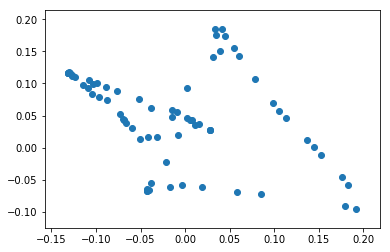

In [60]:
plt.scatter(x_gps, y_gps)
plt.show()

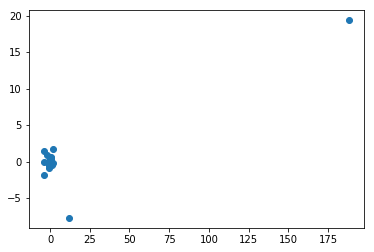

In [61]:
plt.scatter(xlistfinal, ylistfinal)
plt.show()

In [ ]:
plt.plot(xlistfinal - x_gps)
plt.show()

In [ ]:
plt.plot(ylistfinal- y_gps)
plt.show()

In [ ]:
#remove the outlier
x_clean = xlistfinal[xlistfinal < 8]
y_clean = ylistfinal[xlistfinal < 8]
x_gps_clean = x_gps[xlistfinal < 8]
y_gps_clean = y_gps[xlistfinal <8]

In [ ]:
plt.plot(x_clean - x_gps_clean)
plt.show()

In [ ]:
plt.plot(y_clean - y_gps_clean)
plt.show()

In [ ]:
plt.plot(x_clean)
plt.show()

In [ ]:
plt.plot(x_gps_clean)
plt.show()

In [ ]:
plt.plot(y_clean)
plt.show()

In [ ]:
from scipy.interpolate import UnivariateSpline
from scipy.signal import wiener, filtfilt, butter, gaussian, freqz
from scipy.ndimage import filters
import scipy.optimize as op

#gaussian kernel
b = gaussian(39, 10)
b1 = gaussian(39, 5)

x_clean_smoothed = filters.convolve1d(x_clean, b/b.sum())
y_clean_smoothed = filters.convolve1d(y_clean, b/b.sum())
#y_clean_smooth = np.smooth(y_clean, 10, 'hanning')

In [ ]:
plt.plot(-1*x_clean_smoothed); plt.show()

In [ ]:
plt.plot(x_gps_clean); plt.show()

In [ ]:
plt.plot(y_clean_smoothed)
plt.show()

In [ ]:
#plt.plot(y_clean_smoothed - y_gps_clean); plt.show()

In [ ]:
plt.plot(y_gps_clean)
plt.show()

In [ ]:
plt.scatter(-1*x_clean_smoothed, y_clean_smoothed); plt.show()

In [ ]:
plt.scatter(x_gps_clean, y_gps_clean); plt.show()

In [ ]:
errors = []
length = len(x_clean_smoothed)
#[len(x_clean_smoothed), len(x_gps_clean)]
for i in range(length):
    x_truth = x_gps_clean[i]
    y_truth = y_gps_clean[i]
    x_pred = -1*x_clean_smoothed[i]
    y_pred = y_clean_smoothed[i]
    error = np.sqrt( np.square(x_truth-x_pred) + np.square(y_truth-y_pred) )
    errors.append(error)


In [ ]:
plt.plot(errors); plt.show()

In [ ]:
sorted_data = np.sort(errors)
yvals=np.arange(len(sorted_data))/float(len(sorted_data)-1)
plt.plot(sorted_data,yvals)
plt.show()

In [ ]:
plt.plot(b)
plt.show()

In [ ]:
plt.plot(b1)
plt.show()

In [ ]:
plt.plot(y_gps_clean)
plt.show()

In [ ]:
[len(x_clean), len(y_clean)]

In [ ]:
[min(latlist1), max(latlist1), min(lonlist1), max(lonlist1)]

In [ ]:
plt.scatter(latlistfinal, lonlistfinal)
#plt.axis([37.4002, 37.4029, 121.9735, 121.9774])
#plt.axis([min(latlistfinal), max(latlistfinal), min(lonlistfinal), max(lonlistfinal)])
plt.show()

In [ ]:
plt.scatter(latlist1, lonlist1)
plt.show()

In [ ]:
plt.hist(latlist1)
plt.show()

In [ ]:
plt.hist(lonlist1)
plt.show()

In [ ]:
#visualize the ones with small errors

latlist2 = latlist1[np.abs(latlist1) <1]
lonlist2 = lonlist1[np.abs(latlist1) <1]
latlist3 = latlist2[np.abs(lonlist2) <1]
lonlist3 = lonlist2[np.abs(lonlist2) <1]

In [ ]:
plt.hist(latlist2)
plt.show()

In [ ]:
plt.hist(lonlist3)
plt.show()

In [ ]:
plt.scatter(latlist3, lonlist3)
plt.show()

In [ ]:
latlist3.shape

In [ ]:
#error in terms of meters
center = [ 37.40040, -121.97354]
corner1 = [ 37.40029525, -121.97367858]
predicted1 = [latlist1[0], lonlist1[0]]
predicted2 = [latlist1[50], lonlist1[50]]

broadmoor1 = [37.314376, -121.985203]
broadmoor2 = [37.312464, -121.985718]
[haversinedist1(corner1, center), haversinedist1(predicted1, center), 
 haversinedist1(predicted2, center), haversinedist1(broadmoor1, broadmoor2)]

In [ ]:
length = len(latlist1)
coords = []
for i in range(length):
    coords.append( [latlist1[i], lonlist1[i]] )


In [ ]:
error = []

for predicted in coords:
    error.append(haversinedist1(predicted , center))

In [1]:
plt.plot(error)
plt.show()

NameError: name 'plt' is not defined

In [ ]:
cols = ['gpslat','netgpslon']
for col in cols: 
    orderClTs[col] = pd.to_numeric(orderClTs[col], errors='coerce')

In [ ]:
orderClTs['gpslat'].shape

In [ ]:
plt.scatter(orderClTs['gpslat'], orderClTs['netgpslon'],color='g')

plt.axis([37.4002, 37.4029, 121.9735, 121.9774])
plt.show()

In [ ]:
length = len(orderClTs['gpslat'])
gps_x = []
gps_y = []
for i in range(length):
    lat = orderClTs['gpslat'][i]
    lon = orderClTs['netgpslon'][i]
    gps_xy = lat_lon_2_xy(lat, lon)
    gps_x.append( gps_xy[0] )
    gps_y.append( gps_xy[1] )

    

In [ ]:
plt.scatter(gps_x, gps_y)
plt.show()

In [ ]:
plt.scatter(latlist3, lonlist3)
plt.show()

In [ ]:
a = np.array(latlist)
b = np.array(lonlist)
d = np.polyfit(a, b, 10)

outputpoints = pd.DataFrame([])
outputpoints['latlist'] = a
outputpoints['lonlist'] = b

guessLon = []
# Switch up the variable so can rapidly test each column
for r in np.array(outputpoints['latlist']):
    guessLon.append(
        d[0] * pow(r, 10) + d[1] * pow(r, 9) + d[2] * pow(r, 8) + d[3] * pow(r, 7) + d[4] * pow(r, 6) + d[5] * pow(r,
                                                                                                                   5) +
        d[6] * pow(r, 4) + d[7] * pow(r, 3) + d[8] * pow(r, 2) + d[9] * r + d[10])
outputpoints['guesslon'] = np.absolute(np.array(guessLon))

# Newlat range (set based on geometry of port)
newlatlow = 37.5277789057
newlathigh = 37.5342269681
latincre = (newlathigh - newlatlow) / len(serverdata)
newlats = list(np.arange(newlatlow, newlathigh, latincre))

newlons = []
for l in newlats:
    newlons.append(float(
        d[0] * pow(l, 10) + d[1] * pow(l, 9) + d[2] * pow(l, 8) + d[3] * pow(l, 7) + d[4] * pow(l, 6) + d[5] * pow(l,
                                                                                                                   5) +
        d[6] * pow(l, 4) + d[7] * pow(l, 3) + d[8] * pow(l, 2) + d[9] * l + d[10]))

#
finaldf = pd.DataFrame([])
non_decimal = re.compile(r'[^\d.]+')
for index, row in serverdata.iterrows():
    finaldf.loc[row['RID'], 'rid'] = row['RID']
    finaldf.loc[row['RID'], 'tid'] = row['TID']
    finaldf.loc[row['RID'], 'gwip'] = row['gwip']
    finaldf.loc[row['RID'], 'msgno'] = non_decimal.sub('', str(row['MsgNo']))
    finaldf.loc[row['RID'], 'ts'] = row['ts']
    finaldf.loc[row['RID'], 'gpslat'] = non_decimal.sub('', str(row['gpslat']))
    finaldf.loc[row['RID'], 'netgpslon'] = non_decimal.sub('', str(row['gpslon']))
    finaldf.loc[row['RID'], 'gwlat'] = non_decimal.sub('', str(row['gwlat']))
    finaldf.loc[row['RID'], 'netgwlon'] = non_decimal.sub('', str(row['gwlon']))
    finaldf.loc[row['RID'], 'temp'] = row['temp']
    finaldf.loc[row['RID'], 'pressure'] = row['pressure']
    finaldf.loc[row['RID'], 'elevation'] = row['elevation']
    finaldf.loc[row['RID'], 'rssic'] = row['rssic']
    finaldf.loc[row['RID'], 'lsnr'] = float(row['lsnr'])

finaldf['reportlat'] = newlats
finaldf['reportlon'] = newlons


In [ ]:
d

In [ ]:
plt.scatter(a,b)
plt.show()

In [ ]:
finaldf.shape

In [ ]:
finaldf.head(20)

In [ ]:
finaldf.dtypes

In [ ]:
cols = ['gpslat','netgpslon']
for col in cols: 
    finaldf[col] = pd.to_numeric(finaldf[col], errors='coerce')

In [ ]:
finaldf.reportlon = finaldf.reportlon*(-1)

In [ ]:
finaldf1 = finaldf[finaldf[col] >0]
finaldf1.head()

In [ ]:
plt.scatter(finaldf1['gpslat'], finaldf1['reportlat'])
plt.locator_params(nbins=10)
plt.axis([min(finaldf1['gpslat']), max(finaldf1['gpslat']), min(finaldf1['reportlat']), max(finaldf1['reportlat'])])
plt.show()

In [ ]:
[min(finaldf1['gpslat']), max(finaldf1['gpslat'])]

In [ ]:
plt.scatter(finaldf1['netgpslon'], finaldf1['reportlon'])
plt.axis([min(finaldf1['netgpslon']), max(finaldf1['netgpslon']), min(finaldf1['reportlon']), max(finaldf1['reportlon'])])
plt.show()

In [ ]:
[min(finaldf1['netgpslon']), max(finaldf1['netgpslon'])]

In [ ]:
plt.scatter(finaldf1['gpslat'], finaldf1['netgpslon'],color='g')


plt.axis([37.4002, 37.4029, 121.9735, 121.9774])
plt.show()

In [ ]:
plt.scatter(finaldf1['reportlat'], finaldf1['reportlon'],color='r')
plt.axis([37.528,37.534,121.46,121.6])
plt.show()

In [ ]:
finaldf.to_csv('fportwb.csv')

for index, row in finaldf.iterrows():
    tidr = long(row["tid"])
    tsr = str(row["ts"])
    latr = float(row["reportlat"])
    lonr = float(row["reportlon"])
    tempr = row["temp"]
    pressurer = row["pressure"]
    elevationr = row["elevation"]
    cur.execute(
        "INSERT INTO fport (TID, ts, LAT, LON, TEMP, PRESSURE, ELEVATION) VALUES ('tidr', 'tsr', 'latr', 'lonr', 'tempr', 'pressurer', 'elevationr')")
# #Some row indexing to get all the values back in
#	cur.execute("INSERT INTO fport VALUES (7, 1004, '2017-08-10T22:45:26.716094Z', -37.1, -122.2, 29.1, 89.1, 12000.0)")
# (/*RID, TID, ts, LAT, LON, TEMP, PRESSURE, ELEVATION */)")
# Can insert back in, but not writing back for some reason


db.close()